In [1]:
import pandas as pd
import numpy as np
import os, fnmatch
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
%matplotlib inline

In [2]:
root = '/Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data'
#Get all of the cost reports
matches = []
for root, dirnames, filenames in os.walk(root):
  for filename in fnmatch.filter(filenames, '*.dta'):
    matches.append(os.path.join(root, filename))

In [3]:
len(matches)

26

In [ ]:
#df = pd.read_stata('CPS Data/2015/cpsmar2015.dta', convert_categoricals = False)

### CBSAs look like they are available for 2005 onwards for all entries; CMSA might be available for all time

In [4]:
columns_to_keep = ['year', 'msafips', 'cbsafips', 'age', 'studftpt', 'schlvl', 'relref95']

In [15]:
def process_CPS_file(path):
    print 'Processing {}'.format(path)
    df_in = pd.read_stata(path, convert_categoricals = False) #, columns=columns_to_keep)
    df_in['In Sample'] = in_sample(df_in)
    df_in = df_in[df_in['In Sample'] == 1]
    return df_in

In [144]:
df = pd.read_pickle('imported_df.pickle')

In [ ]:
df = pd.DataFrame()
for item in matches:
    if not df.empty:
        df = df.append(process_CPS_file(item))
    else:
        df = process_CPS_file(item)

In [140]:
#df.to_pickle('imported_df.pickle')

In [7]:
def in_sample(data):
    #In sample if between 18 and 34 AND (not in college or not full time)
#     if row['age'] >= 18 and row['age'] < 35 and not (row['age'] < 25 and (row['schlvl'] == 2 and row['studftpt'] == 1)):
#         return 1
#     else:
#         return 0
    return ((data['age'] >= 18) & (data['age'] < 35) & ~((data['age'] < 25) & ((data['schlvl'] == 2) & (data['studftpt'] == 1)))).apply(lambda x: 1 if x else 0)

In [8]:
def independently(data):
    #if row['relref95'] in [1, 2, 3, 10, 12, 13, 14, 15, 16, 17 , 18]:
#     if row['relref95'] in [1, 2, 3, 13, 14, 15, 16, 17 , 18]:
#         return 1
#     else:
#         return 0
    return data['relref95'].isin([1, 2, 3, 13, 14, 15, 16, 17 , 18]).apply(lambda x: 1 if x else 0)

In [9]:
def millenial(data):
    return ((data['age'] >= 18) & (data['age'] < 35) & ~((data['age'] < 25))).apply(lambda x: 1 if x else 0)

In [10]:
def pct_pivot(data, index=['In Sample'], columns=['Living Independently']):
    table = pd.pivot_table(data, values='age', index=index, columns=columns,
               aggfunc=np.count_nonzero,
              margins=True)
    table.drop('All', inplace=True)
    return table.div( table.iloc[:,-1], axis=0 )

In [66]:
[item for item in df.columns.tolist() if 'msa' in item]

['cmsacode', 'msafips', 'smsa04', 'smsa93', 'smsastat']

In [145]:
df = df[columns_to_keep]

In [18]:
len(df)

1827837

In [132]:
len(df[df['In Sample'] == 1])

1230607

In [147]:
df['Living Independently'] = independently(df)

In [20]:
df.columns

Index([u'year', u'msafips', u'cbsafips', u'age', u'studftpt', u'schlvl',
       u'relref95', u'Living Independently'],
      dtype='object')

In [21]:
pct_pivot(df, index=['year'], columns=['Living Independently'])

Living Independently,0,1,All
year,,,
1990,1.000000,NaN,1
1991,1.000000,NaN,1
1992,1.000000,NaN,1
1993,1.000000,NaN,1
1994,1.000000,NaN,1
1995,0.399922,0.600078,1
2000,0.281176,0.718824,1
2001,0.278979,0.721021,1
2002,0.272757,0.727243,1


In [15]:
pd.pivot_table(df, values='age', index=['year'], columns=['Living Independently'],
               aggfunc=np.count_nonzero,
              margins=True)

Living Independently,0,1,All
year,,,
2000,20665,52830,73495
2001,21487,55533,77020
2002,22494,59975,82469
2003,22767,58566,81333
2004,22213,57128,79341
2005,22336,56605,78941
2006,22034,55282,77316
2007,21825,54073,75898
2008,22489,53312,75801


In [26]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [236]:
# make a re-usable function to draw nice bar charts
def line_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None, filename=''):
    
#     ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
#                    color=color, edgecolor='k', grid=False, ylim=ylim)
    
    ax = data.plot(kind='line', figsize=[9, 6], alpha=0.8, 
                    grid=False, ylim=ylim, x_compat = True,
                   linewidth = 2, marker = 'o',
                  color = color)
    
    #ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom='off',      # ticks along the bottom edge are off
        top='off'         # ticks along the top edge are off
        )

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',      # ticks along the bottom edge are off
        )

    ax.set_axis_bgcolor(axis_bgcolor)   
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)
    
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    if filename: plt.savefig(filename, format='pdf')
    plt.show()

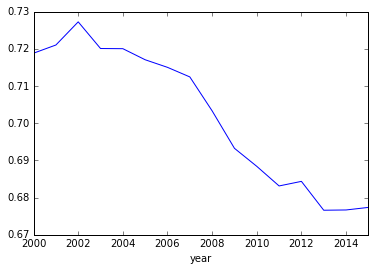

In [231]:
df_plot = pct_pivot(df, index=['year'], columns=['Living Independently'])
df_plot.head()
df_plot[1].plot()

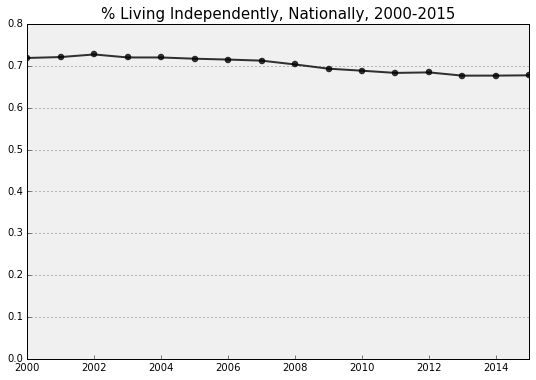

In [237]:
line_chart(df_plot[1], ylim=[0,0.8],
          title = '% Living Independently, Nationally, 2000-2015',
          filename='National.pdf')

In [23]:
df2 = pd.read_stata(matches[0], convert_categoricals = False)

In [94]:
pct_pivot(df2)

Living Independently,0,1,All
In Sample,,,
0,0.143384,0.856616,1
1,0.323323,0.676677,1
All,0.186021,0.813979,1


In [98]:
pct_pivot(df2, index=['Millenial'])

Living Independently,0,1,All
Millenial,,,
0,0.118851,0.881149,1
1,0.369496,0.630504,1
All,0.186021,0.813979,1


In [63]:
df_2014 = df[df['year'] == 2014]

In [244]:
t = df_2014.groupby('cbsafips').count()
t = t[t.year > 100]
df_plot = pct_pivot(df_2014, index=['cbsafips'], columns=['Living Independently'])
df_plot = t.merge(df_plot, left_index=True, right_index=True, how='left')
#df_plot = pct_pivot(df, index=['msafips'], columns=['Living Independently'])
df_plot.rename(columns={0:'Not_Independent', 1:'Independent'}, inplace=True)
df_plot = df_plot.merge(df_rent, how='left', right_on='cbsafips', left_index=True)

In [245]:
df_plot.head(3)

,year,msafips,age,studftpt,schlvl,relref95,Living Independently,Not_Independent,Independent,All,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
507,18399,0,18399,1903,1903,18399,18399,0.297407,0.702593,1,0,NaN,NaN,NaN
3,120,0,120,13,13,120,120,0.341667,0.658333,1,10420,"Akron, OH Metro Area",756,20
7,144,0,144,20,20,144,144,0.340278,0.659722,1,10580,"Albany-Schenectady-Troy, NY Metro Area",931,16


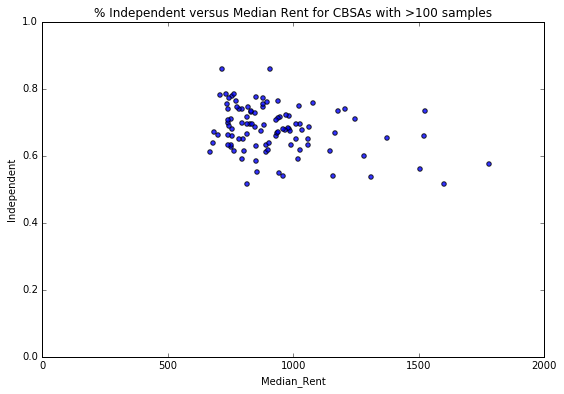

In [225]:
df_plot.plot(x='Median_Rent',
             y= 'Independent',
             title = '% Independent versus Median Rent for CBSAs with >100 samples',
             kind='scatter',
             ylim=[0,1],
             xlim=[0,2000],
            figsize=[9,6],
            alpha=0.8)

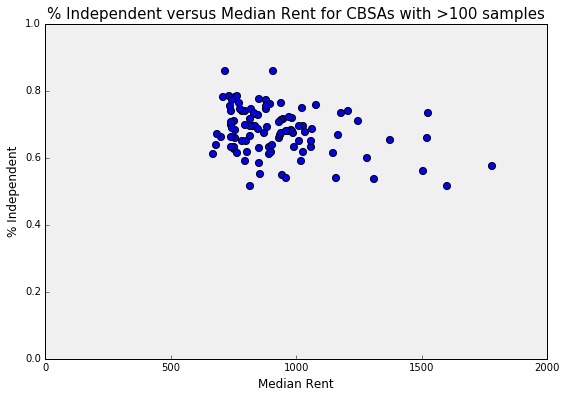

In [254]:
#df3.plot(kind='scatter', x='disadvantage_weighted', y='lane_miles_repaving')

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
rs_scatter = ax.scatter(x=df_plot['Median_Rent'], y=df_plot['Independent'],
                        #c=point_color, edgecolor=edge_color,
                        alpha=1, s=50,
                       )

ax.set_xlim([0,2000])
ax.set_ylim([0, 1])
# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    #bottom='off',      # ticks along the bottom edge are off
    top='off'         # ticks along the top edge are off
    )

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    )

# bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
# arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
# def annotate_district(row):
#     return ax.annotate(row.name, xy=(row['disadvantage_weighted'], row['repaving_percent']), xytext=(row['disadvantage_weighted'] + .01, row['repaving_percent'] + 1),
#             fontproperties=annotation_font,
#             bbox=bbox_style,
#             xycoords='data',
#             arrowprops=arrowprops_style)
# df2.apply(annotate_district, axis=1)

# set title, axis labels, background color
ax.set_title('% Independent versus Median Rent for CBSAs with >100 samples', fontproperties=title_font)
ax.set_xlabel('Median Rent', fontproperties=label_font)
ax.set_ylabel('% Independent', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)
    
#plt.show()
plt.savefig('Median Rent Scatter.pdf', format='pdf')

In [95]:
len(df_plot)

326

In [77]:
df_plot.head()

Living Independently,0,1,All
msafips,,,
80,0.246341,0.753659,1
160,0.263533,0.736467,1
200,0.236257,0.763743,1
240,0.326656,0.673344,1
380,0.240901,0.759099,1


In [50]:
df_cbsa = pd.pivot_table(df_2015, values='age', index=['cbsafips'], columns=['Living Independently'],
               aggfunc=np.count_nonzero,
              margins=True)

In [53]:
len(df_cbsa)

297

In [55]:
len(df_cbsa[df_cbsa['All'] > 10])

292

In [85]:
root = '/Users/Lee/Documents/jupyter/notebooks/CP207/Census_Data/'
#Get all of the cost reports
matches = []
for root, dirnames, filenames in os.walk(root):
  for filename in fnmatch.filter(filenames, '*_with_ann.csv'):
    matches.append(os.path.join(root, filename))

In [86]:
len(matches)

1

In [87]:
df_rent = pd.read_csv(matches[0])

In [88]:
df_rent.rename(columns={'GEO.id2':'cbsafips', 'HD01_VD01':'Median_Rent', 'HD02_VD01':'Median_Rent_MOE'},inplace=True)

In [89]:
df_rent.drop('GEO.id', axis=1, inplace=True)

In [90]:
df_rent.head()

,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
0,10140,"Aberdeen, WA Micro Area",819,57
1,10180,"Abilene, TX Metro Area",814,44
2,10300,"Adrian, MI Micro Area",728,57
3,10420,"Akron, OH Metro Area",756,20
4,10460,"Alamogordo, NM Micro Area",845,142


In [87]:
df[df.cbsafips == 41860].groupby('year').count()

,msafips,cbsafips,age,studftpt,schlvl,relref95,Living Independently
year,,,,,,,
2004,0,419,419,29,29,419,419
2005,0,823,823,33,33,823,823
2006,0,798,798,43,43,798,798
2007,0,709,709,43,43,709,709
2008,0,816,816,42,42,816,816
2009,0,815,815,56,56,815,815
2010,0,843,843,49,49,843,843
2011,0,839,839,55,55,839,839
2012,0,857,857,59,59,857,857


In [105]:
df_2015.head()

,year,cbsafips,age,studftpt,schlvl,relref95,Living Independently
6,2015,13820,27,NaN,NaN,2,1
10,2015,33660,22,NaN,NaN,1,1
11,2015,33660,27,NaN,NaN,14,1
18,2015,33860,18,1,1,4,0
19,2015,33860,20,NaN,NaN,4,0


In [106]:
df_rent.head()

,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
0,10140,"Aberdeen, WA Micro Area",819,57
1,10180,"Abilene, TX Metro Area",814,44
2,10300,"Adrian, MI Micro Area",728,57
3,10420,"Akron, OH Metro Area",756,20
4,10460,"Alamogordo, NM Micro Area",845,142


In [138]:
df_cbsa = pct_pivot(df_2014, index=['cbsafips'], columns=['Living Independently'])
df_cbsa.drop('All', axis = 1, inplace = True)
df_cbsa.rename(columns={0:'Not_Independent', 1:'Independent'}, inplace=True)

In [139]:
df_cbsa.head()

Living Independently,Not_Independent,Independent
cbsafips,,
0,0.297407,0.702593
10180,0.500000,0.500000
10420,0.341667,0.658333
10500,0.354167,0.645833
10580,0.340278,0.659722


In [140]:
df_plot = df_cbsa.merge(df_rent, how='left', right_on='cbsafips', left_index=True)

In [141]:
df_plot.head()

Living Independently,Not_Independent,Independent,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
507,0.297407,0.702593,0,NaN,NaN,NaN
1,0.500000,0.500000,10180,"Abilene, TX Metro Area",814,44
3,0.341667,0.658333,10420,"Akron, OH Metro Area",756,20
5,0.354167,0.645833,10500,"Albany, GA Metro Area",712,22
7,0.340278,0.659722,10580,"Albany-Schenectady-Troy, NY Metro Area",931,16


In [142]:
df_plot = df_plot[~pd.isnull(df_plot['Median_Rent'])]

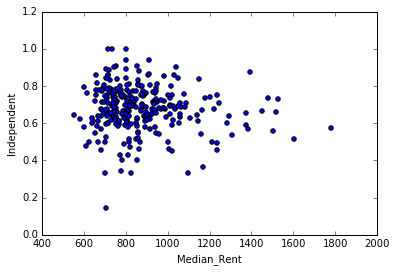

In [143]:
df_plot.plot(x='Median_Rent', y= 'Independent', kind='scatter')

In [144]:
df_plot[df_plot.Independent < 0.2]

Living Independently,Not_Independent,Independent,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
168,0.857143,0.142857,24140,"Goldsboro, NC Metro Area",703,36


In [194]:
df_cbsa = df[df.cbsafips == 38900]

In [195]:
df[df.cbsafips == 38900].groupby('year').count()

,msafips,cbsafips,age,studftpt,schlvl,relref95,Living Independently
year,,,,,,,
2004,0,468,468,21,21,468,468
2005,0,652,652,28,28,652,652
2006,0,580,580,34,34,580,580
2007,0,626,626,37,37,626,626
2008,0,605,605,20,20,605,605
2009,0,631,631,22,22,631,631
2010,0,611,611,39,39,611,611
2011,0,598,598,28,28,598,598
2012,0,580,580,32,32,580,580


In [196]:
df_plot = pct_pivot(df_cbsa, index=['year'], columns=['Living Independently'])

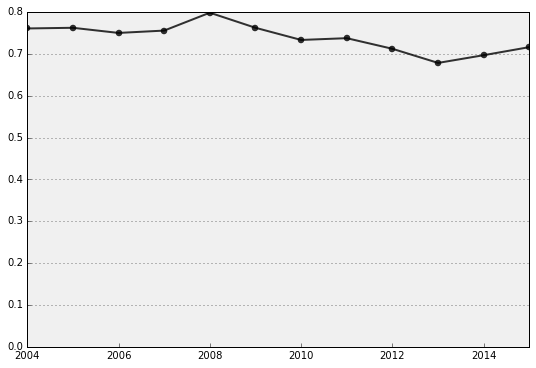

In [197]:
line_chart(df_plot[1], ylim=[0,0.8])

In [239]:
df_plot = pct_pivot(df, index=['cbsafips', 'year'], columns=['Living Independently'])
df_plot = df_plot.unstack(level=0)[1][[41860,35620, 18140, 38900]].rename(columns={41860:'SF/Oakland',
                                                                        35620:'NYC',
                                                                        18140:'Columbus, OH',
                                                                        38900:'Portland, OR'})

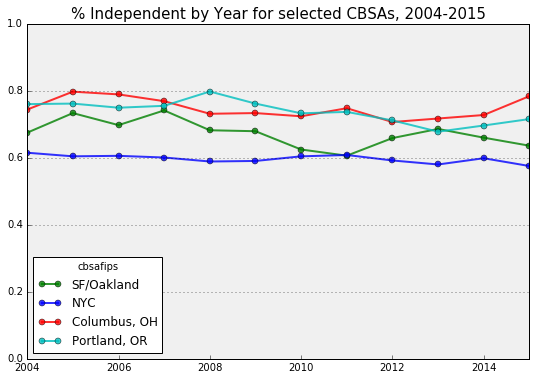

In [240]:
line_chart(df_plot, #SF/Oakland, NYC, Columbus, Portland
           ylim=[0,1],
           color='gbrc',
          title='% Independent by Year for selected CBSAs, 2004-2015',
          filename = 'Selected CBSAs.pdf')

In [116]:
df.columns

Index([u'year', u'msafips', u'cbsafips', u'age', u'studftpt', u'schlvl',
       u'relref95', u'Living Independently'],
      dtype='object')

In [117]:
def pct_pivot(data, index=['In Sample'], columns=['Living Independently']):
    table = pd.pivot_table(data, values='studftpt', index=index, columns=columns,
               aggfunc=np.count_nonzero,
              margins=True)
    table.drop('All', inplace=True)
    return table.div( table.iloc[:,-1], axis=0 )

In [241]:
df_plot = pct_pivot(df, index=['year', 'age'], columns=['Living Independently'])

In [242]:
df_plot.head()

Living Independently         0         1  All
year age                                     
2000 18               0.898737  0.101263    1
     19               0.752355  0.247645    1
     20               0.626037  0.373963    1
     21               0.523211  0.476789    1
     22               0.439115  0.560885    1

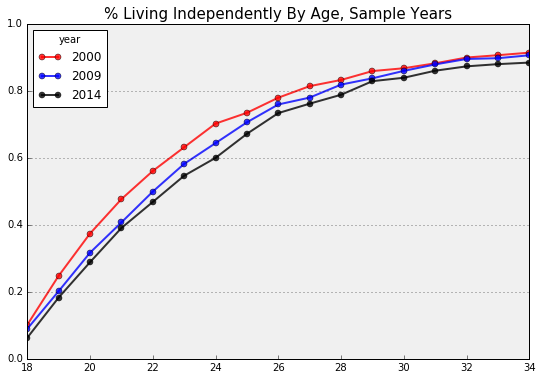

In [243]:
line_chart(df_plot.unstack(level=0)[1][[2000,2009,2014]],
           ylim=[0,1], color='rbk',
           title='% Living Independently By Age, Sample Years',
          filename='Age Distributions.pdf')

Next steps:
- discrete choice models?
- Regresions on other variables?
- trends for specific CBSA's over time?

To have for Tuesday:
- National graph
- Trends - Bay Area Graph, NY, Columbus, Portland (Selected)
- Scatter plots (2014) - Median Rent
- Line graph of age, 2014 (if possible, over time)

For presentation: what are potential next steps?
- Weak trends overall
- Will consider a discrete choice model of choice factors

Sample code from http://statsmodels.sourceforge.net/stable/examples/notebooks/generated/discrete_choice_example.html

In [ ]:
for column in ['Time1', 'Time2']:
    df = df[df[column] <> 9999]

In [ ]:
from __future__ import print_function
import numpy as np
from scipy import stats
#import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols


affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   "+ rate_marriage + age + yrs_married + children"
                   " + religious", dta).fit()

print(affair_mod.summary())